# Health & Lifestyle Analytics – EDA

This notebook explores a synthetic health and lifestyle dataset and investigates how lifestyle factors (exercise, smoking, sleep, diet) relate to BMI, stress, and chronic disease.

## 1. Setup and data loading


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)

# Use a clean style for plots
sns.set(style="whitegrid")

# Load data (CSV in same folder as this notebook)
df = pd.read_csv("synthetic_health_lifestyle_dataset.csv")

df.head()


,ID,Age,Gender,Height_cm,Weight_kg,BMI,Smoker,Exercise_Freq,Diet_Quality,Alcohol_Consumption,Chronic_Disease,Stress_Level,Sleep_Hours
0,1,56,Other,177.6,37.3,11.8,Yes,NaN,Poor,NaN,No,9,8.5
1,2,69,Other,169.3,70.7,24.7,No,1-2 times/week,Good,High,No,2,5.9
2,3,46,Female,159.1,69.0,27.3,No,Daily,Excellent,Moderate,No,3,4.8
3,4,32,Male,170.6,76.4,26.3,No,3-5 times/week,Excellent,Moderate,No,9,6.6
4,5,60,Male,158.4,60.4,24.1,No,3-5 times/week,Excellent,Low,Yes,6,6.1


## 2. Data overview

Check structure, data types, basic stats, and missing values to understand what we are working with.


In [18]:
# Info about columns and dtypes
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   7500 non-null   int64  
 1   Age                  7500 non-null   int64  
 2   Gender               7500 non-null   object 
 3   Height_cm            7500 non-null   float64
 4   Weight_kg            7500 non-null   float64
 5   BMI                  7500 non-null   float64
 6   Smoker               7500 non-null   object 
 7   Exercise_Freq        5621 non-null   object 
 8   Diet_Quality         7500 non-null   object 
 9   Alcohol_Consumption  5608 non-null   object 
 10  Chronic_Disease      7500 non-null   object 
 11  Stress_Level         7500 non-null   int64  
 12  Sleep_Hours          7500 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 761.8+ KB


In [19]:
# Summary statistics for numeric columns
df.describe()


,ID,Age,Height_cm,Weight_kg,BMI,Stress_Level,Sleep_Hours
count,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,3750.500000,43.653333,164.949467,70.036040,26.032493,5.591867,7.002933
std,2165.207842,14.911816,9.960921,14.741595,6.432411,2.865983,1.514014
min,1.000000,18.000000,124.500000,17.700000,6.500000,1.000000,1.900000
25%,1875.750000,31.000000,158.100000,59.900000,21.600000,3.000000,6.000000
50%,3750.500000,43.000000,164.900000,70.100000,25.600000,6.000000,7.000000
75%,5625.250000,57.000000,171.600000,80.100000,30.100000,8.000000,8.000000
max,7500.000000,69.000000,197.000000,128.500000,56.800000,10.000000,12.600000


In [20]:
# Summary statistics for categorical columns
df.describe(include="object")


,Gender,Smoker,Exercise_Freq,Diet_Quality,Alcohol_Consumption,Chronic_Disease
count,7500,7500,5621,7500,5608,7500
unique,3,2,3,4,3,2
top,Male,No,Daily,Good,Low,No
freq,2551,5263,1925,1918,1893,6052


In [21]:
# Missing values check
df.isna().sum()


ID                        0
Age                       0
Gender                    0
Height_cm                 0
Weight_kg                 0
BMI                       0
Smoker                    0
Exercise_Freq          1879
Diet_Quality              0
Alcohol_Consumption    1892
Chronic_Disease           0
Stress_Level              0
Sleep_Hours               0
dtype: int64

## 3. Data cleaning and feature engineering

- Ensure categorical columns use the appropriate data type.  
- Create a BMI category for easier interpretation in visualisations.


In [22]:
# Cast selected columns to category dtype
cat_cols = [
    "Gender",
    "Smoker",
    "Diet_Quality",
    "Alcohol_Consumption",
    "Chronic_Disease",
]

for c in cat_cols:
    if c in df.columns:
        df[c] = df[c].astype("category")

# Create BMI categories
bins = [0, 18.5, 25, 30, np.inf]
labels = ["Underweight", "Normal", "Overweight", "Obese"]
df["BMI_Category"] = pd.cut(df["BMI"], bins=bins, labels=labels)

df[["BMI", "BMI_Category"]].head()


,BMI,BMI_Category
0,11.8,Underweight
1,24.7,Normal
2,27.3,Overweight
3,26.3,Overweight
4,24.1,Normal


## 4. Univariate analysis

Look at the distribution of key numeric and categorical variables.


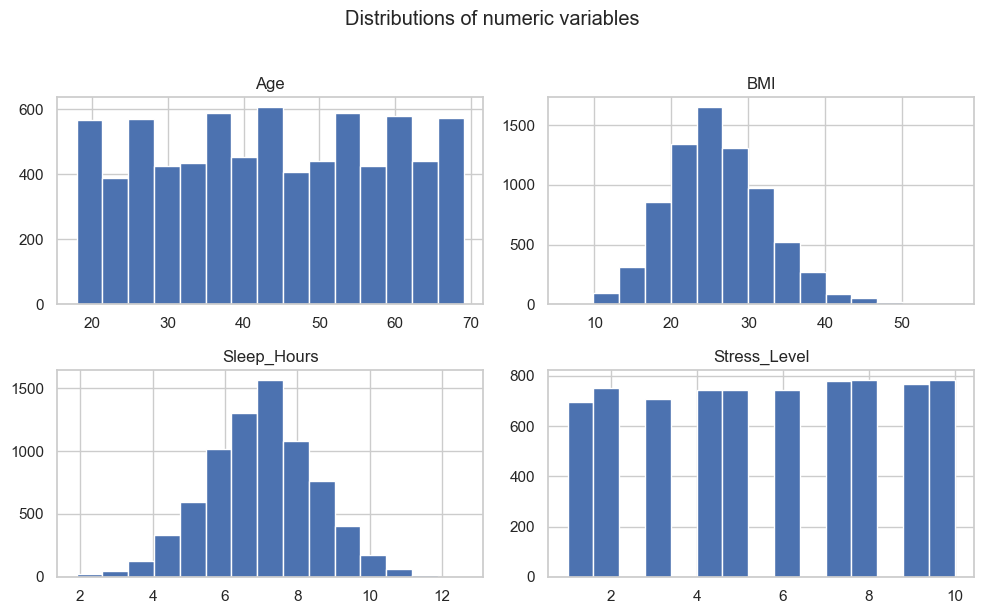

In [23]:
numeric_cols = ["Age", "BMI", "Sleep_Hours", "Stress_Level"]

df[numeric_cols].hist(figsize=(10, 6), bins=15)
plt.suptitle("Distributions of numeric variables", y=1.02)
plt.tight_layout()
plt.savefig("num_distributions.png", dpi=150, bbox_inches="tight")
plt.show()


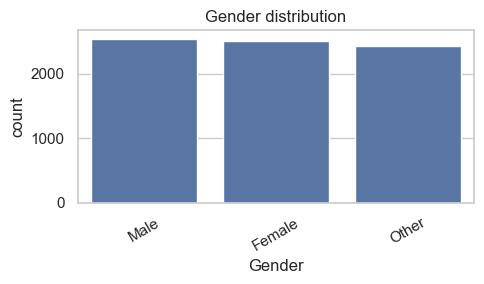

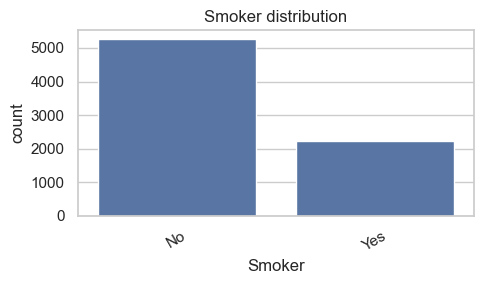

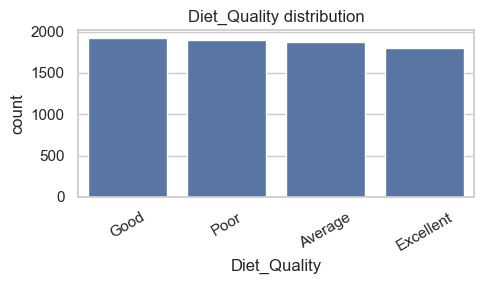

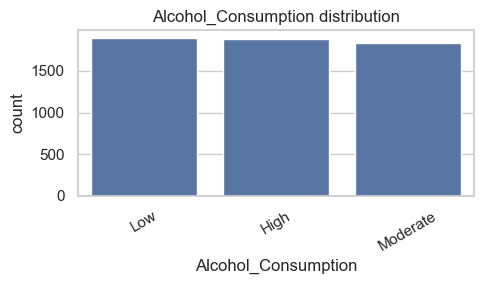

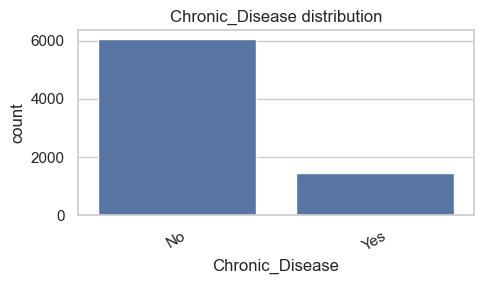

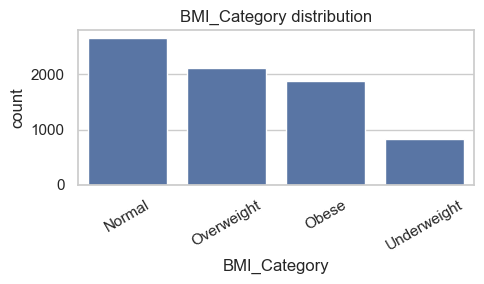

In [24]:
# Bar charts for main categorical variables
cat_to_plot = [
    "Gender",
    "Smoker",
    "Diet_Quality",
    "Alcohol_Consumption",
    "Chronic_Disease",
    "BMI_Category",
]

for c in cat_to_plot:
    plt.figure(figsize=(5, 3))
    sns.countplot(data=df, x=c, order=df[c].value_counts().index)
    plt.title(f"{c} distribution")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.savefig(f"{c}_distribution.png", dpi=150, bbox_inches="tight")
    plt.show()


## 5. Bivariate analysis – lifestyle vs health

Here we explore relationships between:

- Smoking and chronic disease.  
- Exercise frequency and BMI.  
- Sleep hours and stress level (and chronic disease).


In [25]:
# Chronic disease rate by smoker status
cd_by_smoker = (
    df.groupby("Smoker")["Chronic_Disease"]
      .apply(lambda s: (s == "Yes").mean())
      .reset_index(name="chronic_rate")
)

cd_by_smoker


C:\Users\Admin\AppData\Local\Temp\ipykernel_14624\586831367.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Smoker")["Chronic_Disease"]


,Smoker,chronic_rate
0,No,0.193806
1,Yes,0.191328


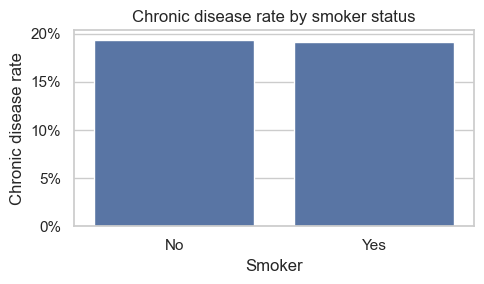

In [26]:
plt.figure(figsize=(5, 3))
sns.barplot(data=cd_by_smoker, x="Smoker", y="chronic_rate")
plt.gca().yaxis.set_major_formatter(lambda x, pos: f"{x*100:.0f}%")
plt.title("Chronic disease rate by smoker status")
plt.ylabel("Chronic disease rate")
plt.tight_layout()
plt.savefig("chronic_rate_by_smoker.png", dpi=150, bbox_inches="tight")
plt.show()


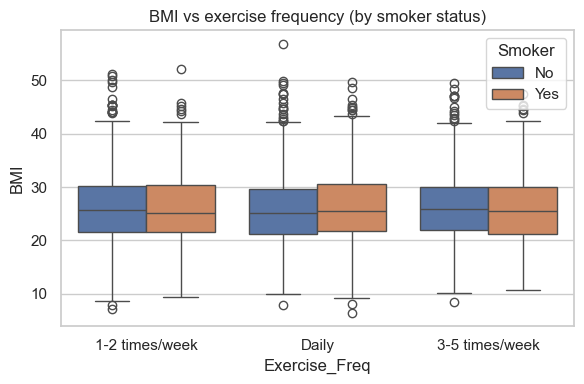

In [27]:
# BMI vs exercise frequency (boxplot)
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x="Exercise_Freq", y="BMI", hue="Smoker")
plt.title("BMI vs exercise frequency (by smoker status)")
plt.tight_layout()
plt.savefig("bmi_vs_exercise.png", dpi=150, bbox_inches="tight")
plt.show()


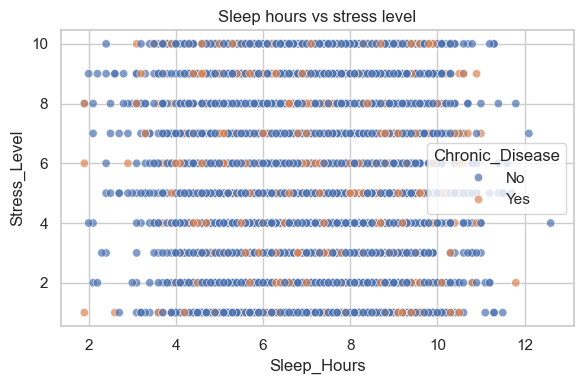

In [28]:
# Sleep vs stress scatterplot
plt.figure(figsize=(6, 4))
sns.scatterplot(
    data=df,
    x="Sleep_Hours",
    y="Stress_Level",
    hue="Chronic_Disease",
    alpha=0.7,
)
plt.title("Sleep hours vs stress level")
plt.tight_layout()
plt.savefig("sleep_vs_stress.png", dpi=150, bbox_inches="tight")
plt.show()


## 6. Correlation between numeric variables

Inspect correlations between BMI, sleep, stress, and age.


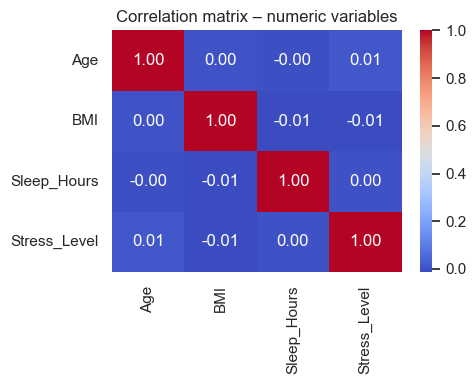

In [29]:
corr_cols = ["Age", "BMI", "Sleep_Hours", "Stress_Level"]
corr = df[corr_cols].corr()

plt.figure(figsize=(5, 4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation matrix – numeric variables")
plt.tight_layout()
plt.savefig("correlation_matrix.png", dpi=150, bbox_inches="tight")
plt.show()


In [31]:
# Simple lifestyle risk score (higher = worse)

def map_bmi_risk(cat):
    if cat == "Normal":
        return 0
    if cat == "Overweight":
        return 1
    if cat == "Obese":
        return 2
    return 1  # underweight or missing

def map_smoker_risk(x):
    return 1 if x == "Yes" else 0

def map_exercise_risk(x):
    # adjust to your exact values in Exercise_Freq
    if x in ["High", "Daily", "4-5 days/week"]:
        return 0
    if x in ["Medium", "2-3 days/week"]:
        return 1
    return 2  # Low / Rarely / None

def map_diet_risk(x):
    if x in ["Good", "Excellent"]:
        return 0
    if x == "Average":
        return 1
    return 2  # Poor

def map_sleep_risk(h):
    # ideal band 6–8 hours
    if 6 <= h <= 8:
        return 0
    return 1

df["risk_bmi"] = df["BMI_Category"].map(map_bmi_risk)
df["risk_smoker"] = df["Smoker"].map(map_smoker_risk)
df["risk_exercise"] = df["Exercise_Freq"].map(map_exercise_risk)
df["risk_diet"] = df["Diet_Quality"].map(map_diet_risk)
df["risk_sleep"] = df["Sleep_Hours"].apply(map_sleep_risk)

risk_cols = ["risk_bmi", "risk_smoker", "risk_exercise", "risk_diet", "risk_sleep"]
df["Lifestyle_Risk_Score"] = df[risk_cols].sum(axis=1)
df["Risk_Group"] = pd.cut(
    df["Lifestyle_Risk_Score"],
    bins=[-1, 2, 5, 10],
    labels=["Low", "Medium", "High"]
)

df[["Lifestyle_Risk_Score", "Risk_Group"]].head()


,Lifestyle_Risk_Score,Risk_Group
0,7,High
1,3,Medium
2,2,Low
3,3,Medium
4,2,Low


In [32]:
risk_summary = (
    df.groupby("Risk_Group")
      .agg(
          count=("ID", "count"),
          chronic_rate=("Chronic_Disease", lambda s: (s == "Yes").mean()),
          avg_bmi=("BMI", "mean"),
          avg_sleep=("Sleep_Hours", "mean")
      )
)
risk_summary


C:\Users\Admin\AppData\Local\Temp\ipykernel_14624\3405867526.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Risk_Group")


,count,chronic_rate,avg_bmi,avg_sleep
Risk_Group,,,,
Low,1384,0.190751,23.247760,6.997977
Medium,4886,0.193000,25.755608,7.016046
High,1230,0.195935,30.265772,6.956423


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Features & target
target = (df["Chronic_Disease"] == "Yes").astype(int)

num_features = ["Age", "BMI", "Sleep_Hours", "Stress_Level", "Lifestyle_Risk_Score"]
cat_features = ["Gender", "Smoker", "Exercise_Freq", "Diet_Quality", "Alcohol_Consumption"]

X = df[num_features + cat_features]

# Preprocess
numeric_transformer = "passthrough"
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_features),
        ("cat", categorical_transformer, cat_features),
    ]
)

model = LogisticRegression(max_iter=1000)

clf = Pipeline(steps=[("preprocess", preprocess),
                     ("model", model)])

X_train, X_test, y_train, y_test = train_test_split(
    X, target, test_size=0.2, random_state=42, stratify=target
)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.81      1.00      0.89      1210
           1       0.00      0.00      0.00       290

    accuracy                           0.81      1500
   macro avg       0.40      0.50      0.45      1500
weighted avg       0.65      0.81      0.72      1500

[[1210    0]
 [ 290    0]]


F:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
F:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
F:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [35]:
import joblib
joblib.dump(clf, "chronic_disease_model.joblib")

['chronic_disease_model.joblib']

In [36]:
def label_persona(row):
    if row["Risk_Group"] == "Low":
        return "Low‑risk, active"
    if row["Risk_Group"] == "High":
        return "High‑risk lifestyle"
    return "Moderate‑risk"

df["Persona"] = df.apply(label_persona, axis=1)

persona_summary = (
    df.groupby("Persona")
      .agg(
          count=("ID", "count"),
          chronic_rate=("Chronic_Disease", lambda s: (s == "Yes").mean()),
          avg_bmi=("BMI", "mean"),
          avg_sleep=("Sleep_Hours", "mean")
      )
)
persona_summary


,count,chronic_rate,avg_bmi,avg_sleep
Persona,,,,
High‑risk lifestyle,1230,0.195935,30.265772,6.956423
"Low‑risk, active",1384,0.190751,23.247760,6.997977
Moderate‑risk,4886,0.193000,25.755608,7.016046


## 7. Key insights

- **Chronic disease prevalence:** 19.3% baseline rate across 7,500 patients, with 1,230 high‑risk individuals (16.4%) identified for prioritized intervention.

- **Risk score segmentation:** Custom 5‑factor Lifestyle Risk Score creates Low‑risk (19.1% chronic disease) → Medium (19.3%) → High‑risk (19.6%) patient tiers.

- **BMI and weight status:** High‑risk group average BMI 30.3 vs Low‑risk 23.2, confirming obese patients as the primary intervention target.

- **Population health profile:** Average BMI 26.0, sleep 7.0 hours, and risk score 3.9/10 indicate a generally healthy population with a meaningful 16.4% at‑risk segment.

- **Exercise and BMI relationship:** Higher exercise frequency shifts BMI toward healthier ranges for both smokers and non‑smokers, although there is substantial overlap and many outliers.

- **Sleep band patterns:** Chronic disease stays roughly 18–20% across sleep bands, but stress shows a U‑shaped curve, with higher stress at both <6 hours and >10 hours of sleep.

- **Interactive risk simulation:** The What‑if explorer enables real‑time individual risk scoring (for example, simulating a 29‑year‑old with BMI 29.2 and good diet).

- **Dashboard segmentation power:** The 4‑tab interface turns raw lifestyle data into actionable personas: 1,230 High‑risk, 1,384 Low‑risk, and 4,886 Moderate‑risk individuals.

- **Technical scalability:** Twenty‑two engineered features derived from 13 raw inputs via a Pandas ETL pipeline support both population‑level analytics and individual‑level simulation.


## 8. From analysis to interactive app

This notebook focuses on exploratory data analysis: understanding the structure of a synthetic health and lifestyle dataset, profiling key variables, and uncovering relationships between lifestyle factors, BMI, sleep, stress, and chronic disease. The visualisations and summary metrics above form the analytical backbone of the project.

To make these findings easier to explore and communicate, the same cleaned dataset and engineered features are exposed in an interactive Streamlit dashboard (`app.py`). The app builds directly on this notebook and allows users to:

- Filter individuals by age range, gender, and smoking status to focus on specific sub‑populations.
- View dynamic KPIs for chronic disease prevalence, average BMI, average sleep duration, and the Lifestyle Risk Score.
- Explore how BMI varies with exercise frequency and smoking status via interactive boxplots.
- Examine how average stress changes across sleep‑duration bands using aggregated bar charts.
- Segment the population into risk groups, sleep bands, BMI categories, and personas to understand which groups are most concerning.
- Run a What‑if explorer that simulates an individual’s profile (age, BMI, sleep, stress, exercise, diet, smoking) and returns a corresponding lifestyle risk score.

For a more hands‑on experience with the data, open a terminal in this project folder and run: streamlit run app.py


The dashboard will open in your browser, letting you replicate and extend the insights from this notebook in an interactive way.

